In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

## Store data, labels in a list

In [2]:
data = []
labels = []
categories = 43 # Since there are 43 categories of classification
size = 30 # Uniform size 
epochs = 10
data_path = "gtsrb-german-traffic-sign" # Dataset

## Preprocessing the Images

In [3]:
for i in range(categories): 
    path = os.path.join(data_path,'train',str(i))
    images = os.listdir(path)
    for a in tqdm(images): # Iterate through a folder
        try:
            image = Image.open(path + '/'+ a) # Open the image
            image = image.resize((size,size)) # Resizing images
            image = np.array(image)
            data.append(image) # Append image data
            labels.append(i) # Append the folder name as the label
        except Exception as e:
            print(e)

100%|██████████████████████████████████████| 240/240 [00:00<00:00, 2524.60it/s]


In [4]:
# This loads the test dataset to be used as a validation dataset
# Code to be used if we need to use the test data as a validation instead of splitting the training data


# dataset = os.path.join(data_path, 'Test.csv')
# images = []
# labels = []
# img_size = size
# rows = pd.read_csv(dataset)
# rows = rows.sample(frac=1).reset_index(drop=True)
#     # pd.DataFrame.sample(): Return a random sample of items from an axis of object.
#     # frac: Fraction of axis items to return.
#     # pd.DataFrame.reset_index(): Reset the index of the DataFrame, and use the default one instead.
#     # drop: This resets the index to the default integer index.
#     # This line randomizes our data which will prevent the model from overfitting to specific classes.
    
# for i, row in tqdm(rows.iterrows()):
        
#     # The for loop cycles through all the rows. 
#     # The .iterrows() function returns an index for each row (The first row is 0, then 1, 2, 3, …. until the final row).
#     img_class = row["ClassId"]
#     img_Path = row["Path"]
#     img = os.path.join(data_path, img_Path)
#     image = Image.open(img)
#     image = image.resize((size,size))
#     image = np.array(image)
#     data.append(image)
#     labels.append(int(img_class))    
        
#     # First, we read the image array (convert it from an array of numbers into an actual picture, so that we can resize it).
#     # Then we resize the image dimensions into 32 X 32 X 3, (it makes training the model lot faster if all the images 
#     # are the same dimensions).
#     # histogram equalization - an equalization technique which improves the contrast in images.
#     if i%5000 == 0:
#         print(f"loaded: {i}")
#     images.append(image)
#     labels.append(img_class)
    
# X_test = np.array(images)
# y_test = np.array(labels)

## Converting the training data lists into numpy arrays

In [5]:
X_train = np.array(data)
y_train = np.array(labels)

## Splitting training data in 80:20 ratio for Training and Validation Sets 

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)
# Splitting the training data into training and validation sets

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

## Save data and labels

In [7]:
np.save('Training_Data/X_train',X_train)
np.save('Training_Data/y_train',y_train)
np.save('Training_Data/X_test',X_test)
np.save('Training_Data/y_test',y_test)

## Load data and labels 

In [8]:
# X_train=np.load('Training_Data/X_train.npy')
# y_train=np.load('Training_Data/y_train.npy')
# X_test=np.load('Training_Data/X_test.npy')
# y_test=np.load('Training_Data/y_test.npy')

In [9]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# Shape of data and labels should be same 

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


## Convert label into onehot encoding

In [10]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

## Building the Model

In [11]:
model = Sequential() # Sequential model

model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))

# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


## Compiling the model

In [12]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


## Fitting/Training the Model 

In [13]:
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Train on 31367 samples, validate on 7842 samples
Epoch 1/10


 6464/31367 [=====>........................] - ETA: 10:26 - loss: 55.7421 - acc: 0.0000e+0 - ETA: 6:53 - loss: 40.5154 - acc: 0.0156    - ETA: 5:56 - loss: 32.4433 - acc: 0.01 - ETA: 5:24 - loss: 27.1713 - acc: 0.01 - ETA: 4:57 - loss: 23.2810 - acc: 0.01 - ETA: 4:38 - loss: 20.5053 - acc: 0.02 - ETA: 4:25 - loss: 18.3550 - acc: 0.02 - ETA: 4:16 - loss: 16.6251 - acc: 0.02 - ETA: 4:08 - loss: 15.2528 - acc: 0.02 - ETA: 4:03 - loss: 14.1205 - acc: 0.02 - ETA: 3:57 - loss: 13.1805 - acc: 0.03 - ETA: 3:53 - loss: 12.3898 - acc: 0.03 - ETA: 3:52 - loss: 11.7331 - acc: 0.03 - ETA: 3:49 - loss: 11.1602 - acc: 0.03 - ETA: 3:46 - loss: 10.6596 - acc: 0.03 - ETA: 3:45 - loss: 10.2340 - acc: 0.03 - ETA: 3:44 - loss: 9.8499 - acc: 0.0331 - ETA: 3:44 - loss: 9.5069 - acc: 0.033 - ETA: 3:42 - loss: 9.2035 - acc: 0.031 - ETA: 3:40 - loss: 8.9298 - acc: 0.032 - ETA: 3:40 - loss: 8.6761 - acc: 0.035 - ETA: 3:38 - loss: 8.4470 - acc: 0.034 - ETA: 3:39 - loss: 8.2380 - acc: 0.036 - ETA: 3:37 - loss: 8.0

31367/31367 [==============================] - ETA: 35s - loss: 2.1097 - acc: 0.46 - ETA: 35s - loss: 2.1081 - acc: 0.46 - ETA: 34s - loss: 2.1063 - acc: 0.46 - ETA: 34s - loss: 2.1050 - acc: 0.46 - ETA: 34s - loss: 2.1043 - acc: 0.46 - ETA: 34s - loss: 2.1034 - acc: 0.46 - ETA: 34s - loss: 2.1018 - acc: 0.46 - ETA: 33s - loss: 2.1004 - acc: 0.46 - ETA: 33s - loss: 2.0987 - acc: 0.47 - ETA: 33s - loss: 2.0969 - acc: 0.47 - ETA: 33s - loss: 2.0958 - acc: 0.47 - ETA: 32s - loss: 2.0950 - acc: 0.47 - ETA: 32s - loss: 2.0939 - acc: 0.47 - ETA: 32s - loss: 2.0927 - acc: 0.47 - ETA: 32s - loss: 2.0910 - acc: 0.47 - ETA: 32s - loss: 2.0895 - acc: 0.47 - ETA: 31s - loss: 2.0877 - acc: 0.47 - ETA: 31s - loss: 2.0865 - acc: 0.47 - ETA: 31s - loss: 2.0857 - acc: 0.47 - ETA: 31s - loss: 2.0847 - acc: 0.47 - ETA: 30s - loss: 2.0839 - acc: 0.47 - ETA: 30s - loss: 2.0830 - acc: 0.47 - ETA: 30s - loss: 2.0820 - acc: 0.47 - ETA: 30s - loss: 2.0806 - acc: 0.47 - ETA: 30s - loss: 2.0795 - acc: 0.47 - ETA

 6528/31367 [=====>........................] - ETA: 3:16 - loss: 0.6050 - acc: 0.906 - ETA: 3:40 - loss: 0.7510 - acc: 0.828 - ETA: 3:26 - loss: 0.7502 - acc: 0.812 - ETA: 3:35 - loss: 0.7606 - acc: 0.812 - ETA: 3:31 - loss: 0.8129 - acc: 0.787 - ETA: 3:28 - loss: 0.8392 - acc: 0.776 - ETA: 3:27 - loss: 0.8204 - acc: 0.781 - ETA: 3:25 - loss: 0.8026 - acc: 0.781 - ETA: 3:23 - loss: 0.8122 - acc: 0.781 - ETA: 3:26 - loss: 0.8301 - acc: 0.778 - ETA: 3:24 - loss: 0.8221 - acc: 0.772 - ETA: 3:23 - loss: 0.8493 - acc: 0.763 - ETA: 3:27 - loss: 0.8473 - acc: 0.762 - ETA: 3:25 - loss: 0.8801 - acc: 0.752 - ETA: 3:24 - loss: 0.8659 - acc: 0.756 - ETA: 3:24 - loss: 0.8501 - acc: 0.755 - ETA: 3:22 - loss: 0.8458 - acc: 0.750 - ETA: 3:23 - loss: 0.9202 - acc: 0.743 - ETA: 3:23 - loss: 0.9026 - acc: 0.748 - ETA: 3:22 - loss: 0.8832 - acc: 0.751 - ETA: 3:22 - loss: 0.8757 - acc: 0.751 - ETA: 3:23 - loss: 0.8789 - acc: 0.747 - ETA: 3:22 - loss: 0.8660 - acc: 0.751 - ETA: 3:22 - loss: 0.8764 - acc: 0

31367/31367 [==============================] - ETA: 36s - loss: 0.6528 - acc: 0.81 - ETA: 35s - loss: 0.6524 - acc: 0.81 - ETA: 35s - loss: 0.6521 - acc: 0.81 - ETA: 35s - loss: 0.6521 - acc: 0.81 - ETA: 35s - loss: 0.6517 - acc: 0.81 - ETA: 34s - loss: 0.6517 - acc: 0.81 - ETA: 34s - loss: 0.6511 - acc: 0.81 - ETA: 34s - loss: 0.6510 - acc: 0.81 - ETA: 34s - loss: 0.6510 - acc: 0.81 - ETA: 34s - loss: 0.6512 - acc: 0.81 - ETA: 33s - loss: 0.6509 - acc: 0.81 - ETA: 33s - loss: 0.6505 - acc: 0.81 - ETA: 33s - loss: 0.6504 - acc: 0.81 - ETA: 33s - loss: 0.6499 - acc: 0.81 - ETA: 32s - loss: 0.6501 - acc: 0.81 - ETA: 32s - loss: 0.6499 - acc: 0.81 - ETA: 32s - loss: 0.6492 - acc: 0.81 - ETA: 32s - loss: 0.6485 - acc: 0.81 - ETA: 32s - loss: 0.6483 - acc: 0.81 - ETA: 31s - loss: 0.6484 - acc: 0.81 - ETA: 31s - loss: 0.6482 - acc: 0.81 - ETA: 31s - loss: 0.6481 - acc: 0.81 - ETA: 31s - loss: 0.6477 - acc: 0.81 - ETA: 30s - loss: 0.6476 - acc: 0.81 - ETA: 30s - loss: 0.6472 - acc: 0.81 - ETA

 6528/31367 [=====>........................] - ETA: 4:26 - loss: 0.5848 - acc: 0.781 - ETA: 3:55 - loss: 0.4833 - acc: 0.828 - ETA: 3:58 - loss: 0.4572 - acc: 0.833 - ETA: 3:59 - loss: 0.4484 - acc: 0.851 - ETA: 3:51 - loss: 0.4345 - acc: 0.862 - ETA: 3:48 - loss: 0.4547 - acc: 0.838 - ETA: 3:47 - loss: 0.4822 - acc: 0.834 - ETA: 3:51 - loss: 0.5747 - acc: 0.812 - ETA: 3:47 - loss: 0.5935 - acc: 0.809 - ETA: 3:51 - loss: 0.5878 - acc: 0.806 - ETA: 3:52 - loss: 0.5605 - acc: 0.818 - ETA: 3:53 - loss: 0.5639 - acc: 0.815 - ETA: 3:56 - loss: 0.5328 - acc: 0.826 - ETA: 3:58 - loss: 0.5154 - acc: 0.830 - ETA: 3:59 - loss: 0.5049 - acc: 0.835 - ETA: 4:00 - loss: 0.5045 - acc: 0.834 - ETA: 4:03 - loss: 0.5184 - acc: 0.832 - ETA: 4:02 - loss: 0.5303 - acc: 0.831 - ETA: 4:02 - loss: 0.5329 - acc: 0.827 - ETA: 4:02 - loss: 0.5176 - acc: 0.834 - ETA: 4:01 - loss: 0.5225 - acc: 0.831 - ETA: 4:00 - loss: 0.5113 - acc: 0.836 - ETA: 4:00 - loss: 0.5038 - acc: 0.837 - ETA: 4:03 - loss: 0.4915 - acc: 0

31367/31367 [==============================] - ETA: 36s - loss: 0.4280 - acc: 0.87 - ETA: 36s - loss: 0.4277 - acc: 0.87 - ETA: 36s - loss: 0.4275 - acc: 0.87 - ETA: 36s - loss: 0.4276 - acc: 0.87 - ETA: 35s - loss: 0.4273 - acc: 0.87 - ETA: 35s - loss: 0.4274 - acc: 0.87 - ETA: 35s - loss: 0.4271 - acc: 0.87 - ETA: 35s - loss: 0.4269 - acc: 0.87 - ETA: 34s - loss: 0.4266 - acc: 0.87 - ETA: 34s - loss: 0.4264 - acc: 0.87 - ETA: 34s - loss: 0.4263 - acc: 0.87 - ETA: 34s - loss: 0.4267 - acc: 0.87 - ETA: 34s - loss: 0.4268 - acc: 0.87 - ETA: 33s - loss: 0.4267 - acc: 0.87 - ETA: 33s - loss: 0.4267 - acc: 0.87 - ETA: 33s - loss: 0.4267 - acc: 0.87 - ETA: 33s - loss: 0.4265 - acc: 0.87 - ETA: 32s - loss: 0.4265 - acc: 0.87 - ETA: 32s - loss: 0.4270 - acc: 0.87 - ETA: 32s - loss: 0.4283 - acc: 0.87 - ETA: 32s - loss: 0.4286 - acc: 0.87 - ETA: 31s - loss: 0.4283 - acc: 0.87 - ETA: 31s - loss: 0.4283 - acc: 0.87 - ETA: 31s - loss: 0.4284 - acc: 0.87 - ETA: 31s - loss: 0.4283 - acc: 0.87 - ETA

 6528/31367 [=====>........................] - ETA: 3:00 - loss: 0.3537 - acc: 0.937 - ETA: 3:30 - loss: 0.1871 - acc: 0.968 - ETA: 3:38 - loss: 0.3545 - acc: 0.906 - ETA: 3:43 - loss: 0.4080 - acc: 0.906 - ETA: 3:47 - loss: 0.3802 - acc: 0.906 - ETA: 3:42 - loss: 0.4045 - acc: 0.906 - ETA: 3:39 - loss: 0.4326 - acc: 0.901 - ETA: 3:38 - loss: 0.4433 - acc: 0.898 - ETA: 3:42 - loss: 0.4214 - acc: 0.895 - ETA: 3:39 - loss: 0.4309 - acc: 0.890 - ETA: 3:41 - loss: 0.4234 - acc: 0.889 - ETA: 3:43 - loss: 0.4042 - acc: 0.890 - ETA: 3:46 - loss: 0.3936 - acc: 0.891 - ETA: 3:44 - loss: 0.4022 - acc: 0.892 - ETA: 3:45 - loss: 0.4030 - acc: 0.887 - ETA: 3:47 - loss: 0.4033 - acc: 0.884 - ETA: 3:47 - loss: 0.4017 - acc: 0.886 - ETA: 3:48 - loss: 0.4050 - acc: 0.887 - ETA: 3:49 - loss: 0.4022 - acc: 0.888 - ETA: 3:48 - loss: 0.3896 - acc: 0.890 - ETA: 3:48 - loss: 0.3784 - acc: 0.894 - ETA: 3:46 - loss: 0.3632 - acc: 0.899 - ETA: 3:46 - loss: 0.3664 - acc: 0.895 - ETA: 3:45 - loss: 0.3763 - acc: 0

31367/31367 [==============================] - ETA: 37s - loss: 0.3505 - acc: 0.89 - ETA: 37s - loss: 0.3505 - acc: 0.89 - ETA: 36s - loss: 0.3504 - acc: 0.89 - ETA: 36s - loss: 0.3502 - acc: 0.89 - ETA: 36s - loss: 0.3500 - acc: 0.89 - ETA: 36s - loss: 0.3499 - acc: 0.89 - ETA: 35s - loss: 0.3498 - acc: 0.89 - ETA: 35s - loss: 0.3497 - acc: 0.89 - ETA: 35s - loss: 0.3497 - acc: 0.89 - ETA: 35s - loss: 0.3499 - acc: 0.89 - ETA: 34s - loss: 0.3496 - acc: 0.89 - ETA: 34s - loss: 0.3492 - acc: 0.89 - ETA: 34s - loss: 0.3490 - acc: 0.89 - ETA: 34s - loss: 0.3488 - acc: 0.89 - ETA: 34s - loss: 0.3491 - acc: 0.89 - ETA: 33s - loss: 0.3491 - acc: 0.89 - ETA: 33s - loss: 0.3492 - acc: 0.89 - ETA: 33s - loss: 0.3492 - acc: 0.90 - ETA: 33s - loss: 0.3493 - acc: 0.90 - ETA: 32s - loss: 0.3492 - acc: 0.90 - ETA: 32s - loss: 0.3490 - acc: 0.90 - ETA: 32s - loss: 0.3487 - acc: 0.90 - ETA: 32s - loss: 0.3488 - acc: 0.90 - ETA: 31s - loss: 0.3486 - acc: 0.90 - ETA: 31s - loss: 0.3483 - acc: 0.90 - ETA

 6528/31367 [=====>........................] - ETA: 3:08 - loss: 0.1755 - acc: 0.937 - ETA: 3:29 - loss: 0.2276 - acc: 0.937 - ETA: 3:23 - loss: 0.3739 - acc: 0.906 - ETA: 3:37 - loss: 0.5161 - acc: 0.867 - ETA: 3:41 - loss: 0.5147 - acc: 0.862 - ETA: 3:38 - loss: 0.4966 - acc: 0.864 - ETA: 3:36 - loss: 0.4873 - acc: 0.857 - ETA: 3:34 - loss: 0.5138 - acc: 0.839 - ETA: 3:38 - loss: 0.4924 - acc: 0.850 - ETA: 3:38 - loss: 0.4886 - acc: 0.850 - ETA: 3:36 - loss: 0.4727 - acc: 0.846 - ETA: 3:38 - loss: 0.4713 - acc: 0.846 - ETA: 3:39 - loss: 0.4750 - acc: 0.843 - ETA: 3:37 - loss: 0.4648 - acc: 0.848 - ETA: 3:39 - loss: 0.4445 - acc: 0.856 - ETA: 3:40 - loss: 0.4461 - acc: 0.859 - ETA: 3:40 - loss: 0.4345 - acc: 0.864 - ETA: 3:41 - loss: 0.4226 - acc: 0.868 - ETA: 3:42 - loss: 0.4292 - acc: 0.863 - ETA: 3:42 - loss: 0.4541 - acc: 0.857 - ETA: 3:41 - loss: 0.4568 - acc: 0.857 - ETA: 3:43 - loss: 0.4610 - acc: 0.856 - ETA: 3:41 - loss: 0.4631 - acc: 0.856 - ETA: 3:42 - loss: 0.4548 - acc: 0

31367/31367 [==============================] - ETA: 38s - loss: 0.2920 - acc: 0.91 - ETA: 38s - loss: 0.2921 - acc: 0.91 - ETA: 37s - loss: 0.2925 - acc: 0.91 - ETA: 37s - loss: 0.2925 - acc: 0.91 - ETA: 37s - loss: 0.2923 - acc: 0.91 - ETA: 37s - loss: 0.2927 - acc: 0.91 - ETA: 36s - loss: 0.2926 - acc: 0.91 - ETA: 36s - loss: 0.2927 - acc: 0.91 - ETA: 36s - loss: 0.2927 - acc: 0.91 - ETA: 36s - loss: 0.2926 - acc: 0.91 - ETA: 36s - loss: 0.2926 - acc: 0.91 - ETA: 35s - loss: 0.2926 - acc: 0.91 - ETA: 35s - loss: 0.2925 - acc: 0.91 - ETA: 35s - loss: 0.2923 - acc: 0.91 - ETA: 35s - loss: 0.2923 - acc: 0.91 - ETA: 34s - loss: 0.2923 - acc: 0.91 - ETA: 34s - loss: 0.2922 - acc: 0.91 - ETA: 34s - loss: 0.2922 - acc: 0.91 - ETA: 34s - loss: 0.2924 - acc: 0.91 - ETA: 33s - loss: 0.2923 - acc: 0.91 - ETA: 33s - loss: 0.2923 - acc: 0.91 - ETA: 33s - loss: 0.2924 - acc: 0.91 - ETA: 33s - loss: 0.2924 - acc: 0.91 - ETA: 32s - loss: 0.2922 - acc: 0.91 - ETA: 32s - loss: 0.2919 - acc: 0.91 - ETA

 6528/31367 [=====>........................] - ETA: 3:17 - loss: 0.1640 - acc: 0.937 - ETA: 3:14 - loss: 0.1619 - acc: 0.937 - ETA: 3:29 - loss: 0.3173 - acc: 0.916 - ETA: 3:40 - loss: 0.3464 - acc: 0.914 - ETA: 3:34 - loss: 0.3144 - acc: 0.912 - ETA: 3:33 - loss: 0.2938 - acc: 0.916 - ETA: 3:40 - loss: 0.3013 - acc: 0.910 - ETA: 3:37 - loss: 0.2943 - acc: 0.914 - ETA: 3:40 - loss: 0.2809 - acc: 0.916 - ETA: 3:41 - loss: 0.3098 - acc: 0.909 - ETA: 3:42 - loss: 0.3043 - acc: 0.909 - ETA: 3:39 - loss: 0.2886 - acc: 0.914 - ETA: 3:41 - loss: 0.2849 - acc: 0.911 - ETA: 3:41 - loss: 0.2763 - acc: 0.910 - ETA: 3:40 - loss: 0.2766 - acc: 0.910 - ETA: 3:39 - loss: 0.2766 - acc: 0.914 - ETA: 3:37 - loss: 0.2815 - acc: 0.911 - ETA: 3:39 - loss: 0.2681 - acc: 0.916 - ETA: 3:39 - loss: 0.2625 - acc: 0.917 - ETA: 3:37 - loss: 0.2625 - acc: 0.917 - ETA: 3:36 - loss: 0.2642 - acc: 0.913 - ETA: 3:36 - loss: 0.2861 - acc: 0.909 - ETA: 3:35 - loss: 0.2827 - acc: 0.910 - ETA: 3:34 - loss: 0.2814 - acc: 0

31367/31367 [==============================] - ETA: 36s - loss: 0.2726 - acc: 0.92 - ETA: 36s - loss: 0.2724 - acc: 0.92 - ETA: 35s - loss: 0.2723 - acc: 0.92 - ETA: 35s - loss: 0.2728 - acc: 0.92 - ETA: 35s - loss: 0.2727 - acc: 0.92 - ETA: 35s - loss: 0.2729 - acc: 0.92 - ETA: 35s - loss: 0.2731 - acc: 0.92 - ETA: 34s - loss: 0.2730 - acc: 0.92 - ETA: 34s - loss: 0.2733 - acc: 0.92 - ETA: 34s - loss: 0.2734 - acc: 0.92 - ETA: 34s - loss: 0.2733 - acc: 0.92 - ETA: 33s - loss: 0.2733 - acc: 0.92 - ETA: 33s - loss: 0.2734 - acc: 0.92 - ETA: 33s - loss: 0.2736 - acc: 0.92 - ETA: 33s - loss: 0.2740 - acc: 0.92 - ETA: 32s - loss: 0.2739 - acc: 0.92 - ETA: 32s - loss: 0.2745 - acc: 0.92 - ETA: 32s - loss: 0.2744 - acc: 0.92 - ETA: 32s - loss: 0.2742 - acc: 0.92 - ETA: 32s - loss: 0.2741 - acc: 0.92 - ETA: 31s - loss: 0.2740 - acc: 0.92 - ETA: 31s - loss: 0.2738 - acc: 0.92 - ETA: 31s - loss: 0.2737 - acc: 0.92 - ETA: 31s - loss: 0.2738 - acc: 0.92 - ETA: 30s - loss: 0.2738 - acc: 0.92 - ETA

 6528/31367 [=====>........................] - ETA: 3:03 - loss: 0.0491 - acc: 1.000 - ETA: 3:08 - loss: 0.2233 - acc: 0.937 - ETA: 3:12 - loss: 0.1857 - acc: 0.947 - ETA: 3:13 - loss: 0.2177 - acc: 0.937 - ETA: 3:14 - loss: 0.2026 - acc: 0.943 - ETA: 3:15 - loss: 0.2403 - acc: 0.916 - ETA: 3:22 - loss: 0.2435 - acc: 0.919 - ETA: 3:27 - loss: 0.2461 - acc: 0.925 - ETA: 3:29 - loss: 0.2376 - acc: 0.930 - ETA: 3:33 - loss: 0.2205 - acc: 0.934 - ETA: 3:35 - loss: 0.2244 - acc: 0.931 - ETA: 3:32 - loss: 0.2166 - acc: 0.929 - ETA: 3:30 - loss: 0.2116 - acc: 0.930 - ETA: 3:30 - loss: 0.2365 - acc: 0.924 - ETA: 3:29 - loss: 0.2352 - acc: 0.922 - ETA: 3:27 - loss: 0.2318 - acc: 0.923 - ETA: 3:30 - loss: 0.2303 - acc: 0.924 - ETA: 3:32 - loss: 0.2281 - acc: 0.923 - ETA: 3:32 - loss: 0.2289 - acc: 0.924 - ETA: 3:31 - loss: 0.2297 - acc: 0.923 - ETA: 3:30 - loss: 0.2247 - acc: 0.924 - ETA: 3:31 - loss: 0.2217 - acc: 0.926 - ETA: 3:32 - loss: 0.2227 - acc: 0.925 - ETA: 3:31 - loss: 0.2239 - acc: 0

31367/31367 [==============================] - ETA: 36s - loss: 0.2788 - acc: 0.92 - ETA: 36s - loss: 0.2786 - acc: 0.92 - ETA: 36s - loss: 0.2785 - acc: 0.92 - ETA: 35s - loss: 0.2783 - acc: 0.92 - ETA: 35s - loss: 0.2785 - acc: 0.92 - ETA: 35s - loss: 0.2783 - acc: 0.92 - ETA: 35s - loss: 0.2782 - acc: 0.92 - ETA: 34s - loss: 0.2783 - acc: 0.92 - ETA: 34s - loss: 0.2781 - acc: 0.92 - ETA: 34s - loss: 0.2781 - acc: 0.92 - ETA: 34s - loss: 0.2780 - acc: 0.92 - ETA: 34s - loss: 0.2779 - acc: 0.92 - ETA: 33s - loss: 0.2781 - acc: 0.92 - ETA: 33s - loss: 0.2783 - acc: 0.92 - ETA: 33s - loss: 0.2784 - acc: 0.92 - ETA: 33s - loss: 0.2782 - acc: 0.92 - ETA: 32s - loss: 0.2781 - acc: 0.92 - ETA: 32s - loss: 0.2785 - acc: 0.92 - ETA: 32s - loss: 0.2790 - acc: 0.92 - ETA: 32s - loss: 0.2796 - acc: 0.92 - ETA: 31s - loss: 0.2795 - acc: 0.92 - ETA: 31s - loss: 0.2794 - acc: 0.92 - ETA: 31s - loss: 0.2791 - acc: 0.92 - ETA: 31s - loss: 0.2790 - acc: 0.92 - ETA: 31s - loss: 0.2797 - acc: 0.92 - ETA

 6528/31367 [=====>........................] - ETA: 5:01 - loss: 0.4763 - acc: 0.906 - ETA: 4:41 - loss: 0.2683 - acc: 0.953 - ETA: 4:18 - loss: 0.3037 - acc: 0.937 - ETA: 4:06 - loss: 0.3513 - acc: 0.929 - ETA: 4:07 - loss: 0.3181 - acc: 0.931 - ETA: 3:59 - loss: 0.3119 - acc: 0.921 - ETA: 3:58 - loss: 0.2755 - acc: 0.928 - ETA: 3:54 - loss: 0.2704 - acc: 0.929 - ETA: 3:55 - loss: 0.2628 - acc: 0.927 - ETA: 3:51 - loss: 0.2708 - acc: 0.928 - ETA: 3:47 - loss: 0.2560 - acc: 0.931 - ETA: 3:50 - loss: 0.2405 - acc: 0.932 - ETA: 3:52 - loss: 0.2257 - acc: 0.937 - ETA: 3:51 - loss: 0.2245 - acc: 0.935 - ETA: 3:52 - loss: 0.2353 - acc: 0.935 - ETA: 3:49 - loss: 0.2916 - acc: 0.929 - ETA: 3:49 - loss: 0.2936 - acc: 0.930 - ETA: 3:47 - loss: 0.2913 - acc: 0.930 - ETA: 3:46 - loss: 0.2869 - acc: 0.930 - ETA: 3:45 - loss: 0.2899 - acc: 0.929 - ETA: 3:43 - loss: 0.2887 - acc: 0.928 - ETA: 3:42 - loss: 0.2858 - acc: 0.930 - ETA: 3:42 - loss: 0.2740 - acc: 0.933 - ETA: 3:43 - loss: 0.2845 - acc: 0

31367/31367 [==============================] - ETA: 36s - loss: 0.2662 - acc: 0.92 - ETA: 36s - loss: 0.2662 - acc: 0.92 - ETA: 36s - loss: 0.2667 - acc: 0.92 - ETA: 35s - loss: 0.2667 - acc: 0.92 - ETA: 35s - loss: 0.2669 - acc: 0.92 - ETA: 35s - loss: 0.2671 - acc: 0.92 - ETA: 35s - loss: 0.2670 - acc: 0.92 - ETA: 34s - loss: 0.2668 - acc: 0.92 - ETA: 34s - loss: 0.2666 - acc: 0.92 - ETA: 34s - loss: 0.2667 - acc: 0.92 - ETA: 34s - loss: 0.2669 - acc: 0.92 - ETA: 33s - loss: 0.2671 - acc: 0.92 - ETA: 33s - loss: 0.2672 - acc: 0.92 - ETA: 33s - loss: 0.2670 - acc: 0.92 - ETA: 33s - loss: 0.2669 - acc: 0.92 - ETA: 33s - loss: 0.2666 - acc: 0.92 - ETA: 32s - loss: 0.2665 - acc: 0.92 - ETA: 32s - loss: 0.2663 - acc: 0.92 - ETA: 32s - loss: 0.2665 - acc: 0.92 - ETA: 32s - loss: 0.2665 - acc: 0.92 - ETA: 31s - loss: 0.2665 - acc: 0.92 - ETA: 31s - loss: 0.2665 - acc: 0.92 - ETA: 31s - loss: 0.2662 - acc: 0.92 - ETA: 31s - loss: 0.2661 - acc: 0.92 - ETA: 30s - loss: 0.2661 - acc: 0.92 - ETA

 6528/31367 [=====>........................] - ETA: 3:54 - loss: 0.0764 - acc: 0.968 - ETA: 4:07 - loss: 0.2639 - acc: 0.890 - ETA: 4:06 - loss: 0.2514 - acc: 0.906 - ETA: 3:54 - loss: 0.2405 - acc: 0.914 - ETA: 3:53 - loss: 0.2089 - acc: 0.925 - ETA: 3:59 - loss: 0.1941 - acc: 0.932 - ETA: 4:05 - loss: 0.1938 - acc: 0.937 - ETA: 4:06 - loss: 0.1860 - acc: 0.941 - ETA: 4:07 - loss: 0.1765 - acc: 0.944 - ETA: 4:07 - loss: 0.1689 - acc: 0.946 - ETA: 4:02 - loss: 0.1817 - acc: 0.946 - ETA: 4:04 - loss: 0.1989 - acc: 0.937 - ETA: 4:00 - loss: 0.2074 - acc: 0.937 - ETA: 3:58 - loss: 0.2375 - acc: 0.935 - ETA: 3:59 - loss: 0.2280 - acc: 0.937 - ETA: 4:00 - loss: 0.2141 - acc: 0.941 - ETA: 3:57 - loss: 0.2269 - acc: 0.937 - ETA: 3:58 - loss: 0.2195 - acc: 0.937 - ETA: 3:56 - loss: 0.2161 - acc: 0.937 - ETA: 3:57 - loss: 0.2121 - acc: 0.935 - ETA: 3:55 - loss: 0.2103 - acc: 0.936 - ETA: 3:56 - loss: 0.2093 - acc: 0.936 - ETA: 3:57 - loss: 0.2086 - acc: 0.934 - ETA: 3:57 - loss: 0.2032 - acc: 0

31367/31367 [==============================] - ETA: 41s - loss: 0.2393 - acc: 0.93 - ETA: 41s - loss: 0.2391 - acc: 0.93 - ETA: 40s - loss: 0.2389 - acc: 0.93 - ETA: 40s - loss: 0.2389 - acc: 0.93 - ETA: 40s - loss: 0.2390 - acc: 0.93 - ETA: 39s - loss: 0.2387 - acc: 0.93 - ETA: 39s - loss: 0.2387 - acc: 0.93 - ETA: 39s - loss: 0.2387 - acc: 0.93 - ETA: 39s - loss: 0.2387 - acc: 0.93 - ETA: 38s - loss: 0.2385 - acc: 0.93 - ETA: 38s - loss: 0.2386 - acc: 0.93 - ETA: 38s - loss: 0.2387 - acc: 0.93 - ETA: 38s - loss: 0.2388 - acc: 0.93 - ETA: 37s - loss: 0.2388 - acc: 0.93 - ETA: 37s - loss: 0.2387 - acc: 0.93 - ETA: 37s - loss: 0.2392 - acc: 0.93 - ETA: 37s - loss: 0.2398 - acc: 0.93 - ETA: 36s - loss: 0.2398 - acc: 0.93 - ETA: 36s - loss: 0.2396 - acc: 0.93 - ETA: 36s - loss: 0.2398 - acc: 0.93 - ETA: 36s - loss: 0.2400 - acc: 0.93 - ETA: 35s - loss: 0.2400 - acc: 0.93 - ETA: 35s - loss: 0.2399 - acc: 0.93 - ETA: 35s - loss: 0.2399 - acc: 0.93 - ETA: 35s - loss: 0.2399 - acc: 0.93 - ETA

 6528/31367 [=====>........................] - ETA: 3:57 - loss: 0.3474 - acc: 0.937 - ETA: 3:41 - loss: 0.1744 - acc: 0.968 - ETA: 4:36 - loss: 0.1988 - acc: 0.937 - ETA: 5:03 - loss: 0.2019 - acc: 0.937 - ETA: 4:56 - loss: 0.2637 - acc: 0.931 - ETA: 4:56 - loss: 0.3226 - acc: 0.921 - ETA: 4:46 - loss: 0.3474 - acc: 0.906 - ETA: 4:37 - loss: 0.4526 - acc: 0.882 - ETA: 4:44 - loss: 0.4991 - acc: 0.892 - ETA: 4:52 - loss: 0.4895 - acc: 0.890 - ETA: 4:58 - loss: 0.4742 - acc: 0.892 - ETA: 5:00 - loss: 0.4493 - acc: 0.895 - ETA: 5:07 - loss: 0.4282 - acc: 0.896 - ETA: 5:08 - loss: 0.4103 - acc: 0.901 - ETA: 5:11 - loss: 0.4001 - acc: 0.904 - ETA: 5:16 - loss: 0.4047 - acc: 0.900 - ETA: 5:19 - loss: 0.3921 - acc: 0.904 - ETA: 5:17 - loss: 0.3869 - acc: 0.902 - ETA: 5:11 - loss: 0.3709 - acc: 0.904 - ETA: 5:10 - loss: 0.3547 - acc: 0.909 - ETA: 5:05 - loss: 0.3571 - acc: 0.909 - ETA: 5:06 - loss: 0.3509 - acc: 0.910 - ETA: 5:02 - loss: 0.3554 - acc: 0.911 - ETA: 4:59 - loss: 0.3456 - acc: 0

31367/31367 [==============================] - ETA: 46s - loss: 0.2747 - acc: 0.92 - ETA: 45s - loss: 0.2746 - acc: 0.92 - ETA: 45s - loss: 0.2753 - acc: 0.92 - ETA: 45s - loss: 0.2754 - acc: 0.92 - ETA: 44s - loss: 0.2757 - acc: 0.92 - ETA: 44s - loss: 0.2760 - acc: 0.92 - ETA: 44s - loss: 0.2760 - acc: 0.92 - ETA: 44s - loss: 0.2764 - acc: 0.92 - ETA: 43s - loss: 0.2764 - acc: 0.92 - ETA: 43s - loss: 0.2763 - acc: 0.92 - ETA: 43s - loss: 0.2767 - acc: 0.92 - ETA: 42s - loss: 0.2771 - acc: 0.92 - ETA: 42s - loss: 0.2779 - acc: 0.92 - ETA: 42s - loss: 0.2781 - acc: 0.92 - ETA: 42s - loss: 0.2790 - acc: 0.92 - ETA: 41s - loss: 0.2792 - acc: 0.92 - ETA: 41s - loss: 0.2793 - acc: 0.92 - ETA: 41s - loss: 0.2796 - acc: 0.92 - ETA: 40s - loss: 0.2796 - acc: 0.92 - ETA: 40s - loss: 0.2796 - acc: 0.92 - ETA: 40s - loss: 0.2798 - acc: 0.92 - ETA: 40s - loss: 0.2797 - acc: 0.92 - ETA: 39s - loss: 0.2804 - acc: 0.92 - ETA: 39s - loss: 0.2804 - acc: 0.92 - ETA: 39s - loss: 0.2804 - acc: 0.92 - ETA

## Checking for accuracy, loss, val acc and val loss 

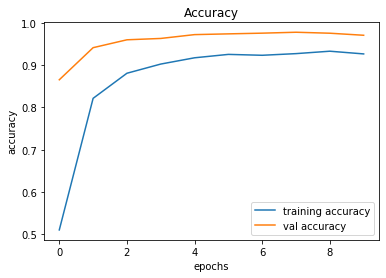

In [14]:
# accuracy 
plt.figure(0)
plt.plot(history.history['acc'], label='training accuracy')
plt.plot(history.history['val_acc'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

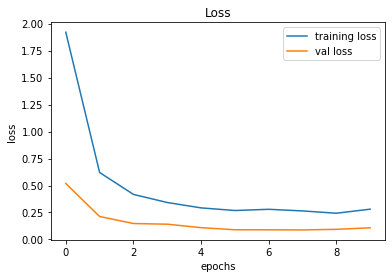

In [15]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## Testing the Model 

In [16]:
# Preparing the test data

def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in tqdm(imgs):
        image = Image.open("gtsrb-german-traffic-sign/"+img)
        image = image.resize((size,size))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [17]:
X_test, label = testing('gtsrb-german-traffic-sign/Test.csv')

100%|███████████████████████████████████| 12630/12630 [00:46<00:00, 271.81it/s]


In [18]:
# Predicts the classes of all the images and store in Y_pred

Y_pred = model.predict_classes(X_test)
Y_pred

array([16,  1, 38, ...,  6,  7, 10], dtype=int64)

In [19]:
# Comparing the accuracy by comparing actual label and prediction class

from sklearn.metrics import accuracy_score
print(accuracy_score(label, Y_pred))

0.942596991290578


## Saving the Model

In [20]:
model.save("Models/GTSRB.h5", save_format='h5')
model.save("Models/GTSRB")

## Loading the Model

In [21]:
import os
import h5py
from tensorflow.keras.models import load_model
path = 'Models/GTSRB'
model = load_model(path)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [22]:
# Declaring a dict of Classes of trafic signs

classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [23]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def test_on_img(img):
    data=[]
    image_org = Image.open(img)
    image = image_org.resize((size,size))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict_classes(X_test)
    return image,image_org,Y_pred 

# Returns resized image, original image and the prediction array

[22]
[22]
Predicted Class: 22-Bumpy road


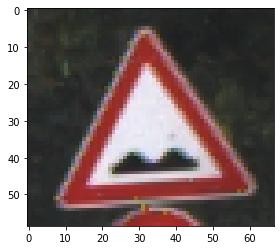

In [24]:
plot,plot2,prediction = test_on_img(data_path+'/Test/00500.png')
print(prediction)
s = [str(i) for i in prediction] # Converting prediction values to str
print(prediction)
a = prediction[0] 
print("Predicted Class: {}-{}".format(a, classes[a]))
plt.imshow(plot2)
plt.show()

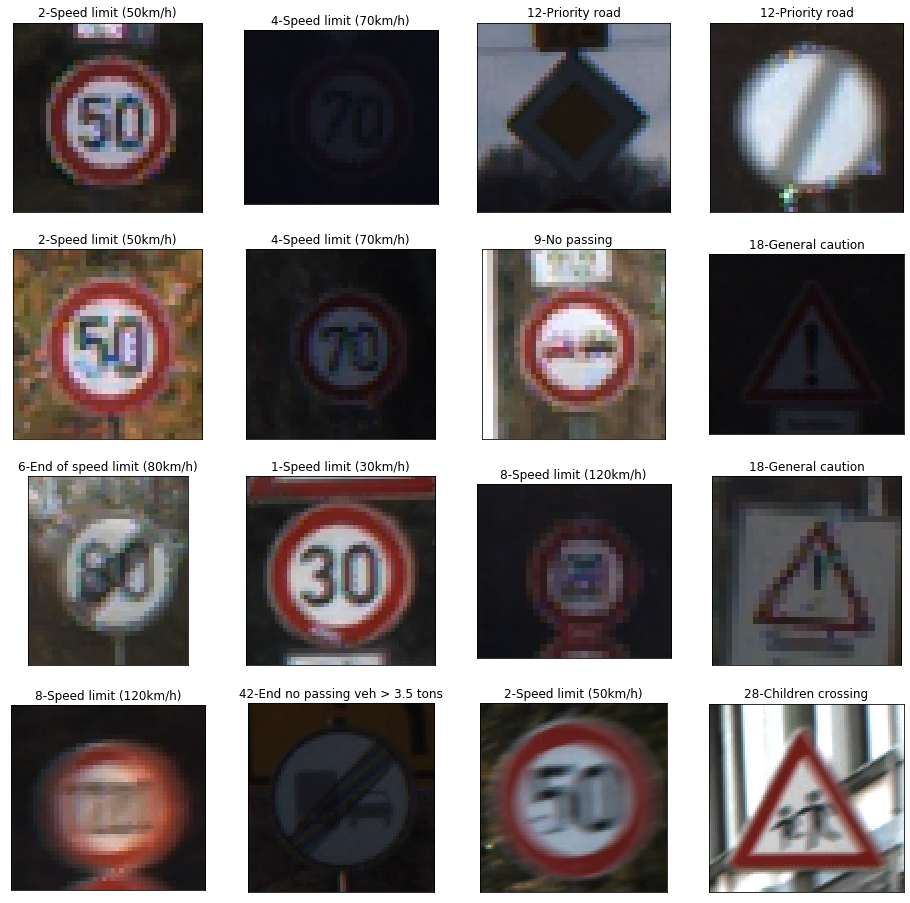

In [25]:
from random import sample

# Importing random samples from the Test directory and applying model on them
test_samples = sample(os.listdir("gtsrb-german-traffic-sign/Test"), 16)
fig = plt.figure(figsize=(16, 16))

for i in range(16):
    img, img_org, prediction = test_on_img(os.path.join(data_path, 'Test', test_samples[i]))
    a = int(prediction[0]) 
    gr = fig.add_subplot(4, 4, i+1)
    gr.imshow(img_org)
    plt.title("{}-{}".format(a, classes[a]))
    gr.axes.get_xaxis().set_visible(False)
    gr.axes.get_yaxis().set_visible(False)
plt.show()

In [26]:
# Code: https://www.youtube.com/watch?v=qahpZkPlTRM
# https://github.com/Spidy20/Traffic_Signs_WebApp
# Dataset: https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign